# Time Series Components 

$$
\LARGE X_t = \text{Trend} + \text{Seasonality} + \text{Cyclic} + \text{Irregular}
$$

- Trend captures the overall direction(up, down , flat)
- Seasonality refers to the repeating pattern at a fixed frequency ( quarterly, monthly, daily)
- Cyclic component refers to the long term oscillations. It can be a business cycle, economic booms, recessions etc.
- Irregular Noise : random fluctuations, unpredictable shocks. Often modeled as white noise.

# Additive vs Multiplicative Decompositions

We use additive decomposition of the series when seasonal variation is constant over time. We use multiplicative decomposition when seasonal fluctuations grow with level. 

Log transformation converts multiplicative into additive. 

$$
\Large X_t = T_t + S_t + R_t 
$$

$$
\Large X_t = T_t * S_t * R_t
$$

Both trend and seasonality can be additive or multiplicative, which means there are four ways these can be combined:

* Additive trend and additive seasonality
* Additive trend and multiplicative seasonality
* Multiplicative trend and additive seasonality
* Multiplicative trend and multiplicative seasonality

**Additive trend and additive seasonality**: 
Additive trend means the trend is linear (straight line), and additive seasonality means there aren’t any changes to widths or heights of seasonal periods over time.

In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use("default")

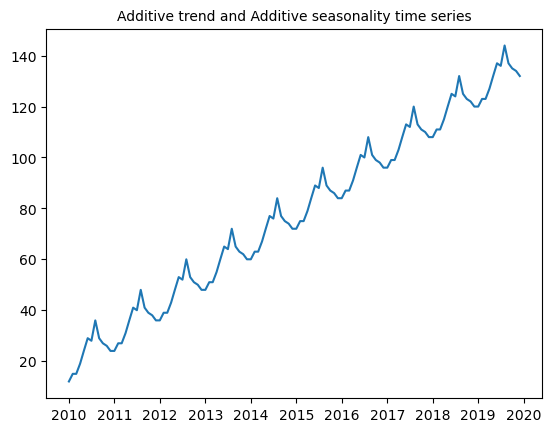

In [8]:
# Terms to be added to single season for seasonality effect
seasonal_adders = [11, 13, 12, 15, 19, 23, 21, 28, 20, 17, 15, 12]
# Immitate 10 years of data
x_range = np.arange(1, 121)

time_series = []
# Split to 10 chunks - 1 year each
for chunk in np.split(x_range, 10):
    for i, val in enumerate(chunk):
        # Add value to seasonal scalar
        time_series.append(val + seasonal_adders[i])

# Convert to DataFrame
df_aa = pd.DataFrame(
    data={'y': time_series}, 
    index=pd.date_range(start='2010-01-01', freq='MS', periods=120)
)

# Plot
plt.title('Additive trend and Additive seasonality time series', size=10)
plt.plot(df_aa);

As you can see, the time series shows a linear trend and seasonality that doesn’t change over time. It’s not the most typical-looking time series, as most likely the amplitude of a seasonal period will change with an increasing trend.

**Additive trend and multiplicative seasonality**:
Additive trend means the trend is linear (straight line), and multiplicative seasonality means there are changes to widths or heights of seasonal periods over time.

**Multiplicative trend and multiplicative seasonality**:
Multiplicative trend means the trend is not linear (curved line), and multiplicative seasonality means there are changes to widths or heights of seasonal periods over time.

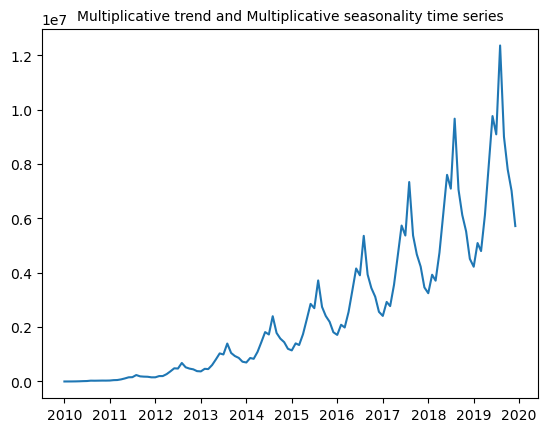

In [3]:
# Single season multiplier factors - for seasonality effect
seasonal_multipliers = [110, 130, 120, 150, 190, 230, 210, 280, 200, 170, 150, 120]
# Immitate 10 years of data
x_range = np.arange(1, 121)
# Raise to the 2.25 power to get upwards "curved" trend
x_range = np.array([x**2.25 for x in x_range])

time_series = []
# Split to 10 chunks - 1 year each
for chunk in np.split(x_range, 10):
    for i, val in enumerate(chunk):
        # Multiply value with seasonal scalar
        time_series.append(val * seasonal_multipliers[i])
        
# Convert to DataFrame
df_mm = pd.DataFrame(
    data={'y': time_series}, 
    index=pd.date_range(start='2010-01-01', freq='MS', periods=120)
)

# Plot
plt.title('Multiplicative trend and Multiplicative seasonality time series', size=10)
plt.plot(df_mm);

This is another widespread type of pattern in time series data. You’ll see it often in sales data, for example, when demand for a specific product/service increases over time, but most of the sales are made in summer months (think airplane tickets).

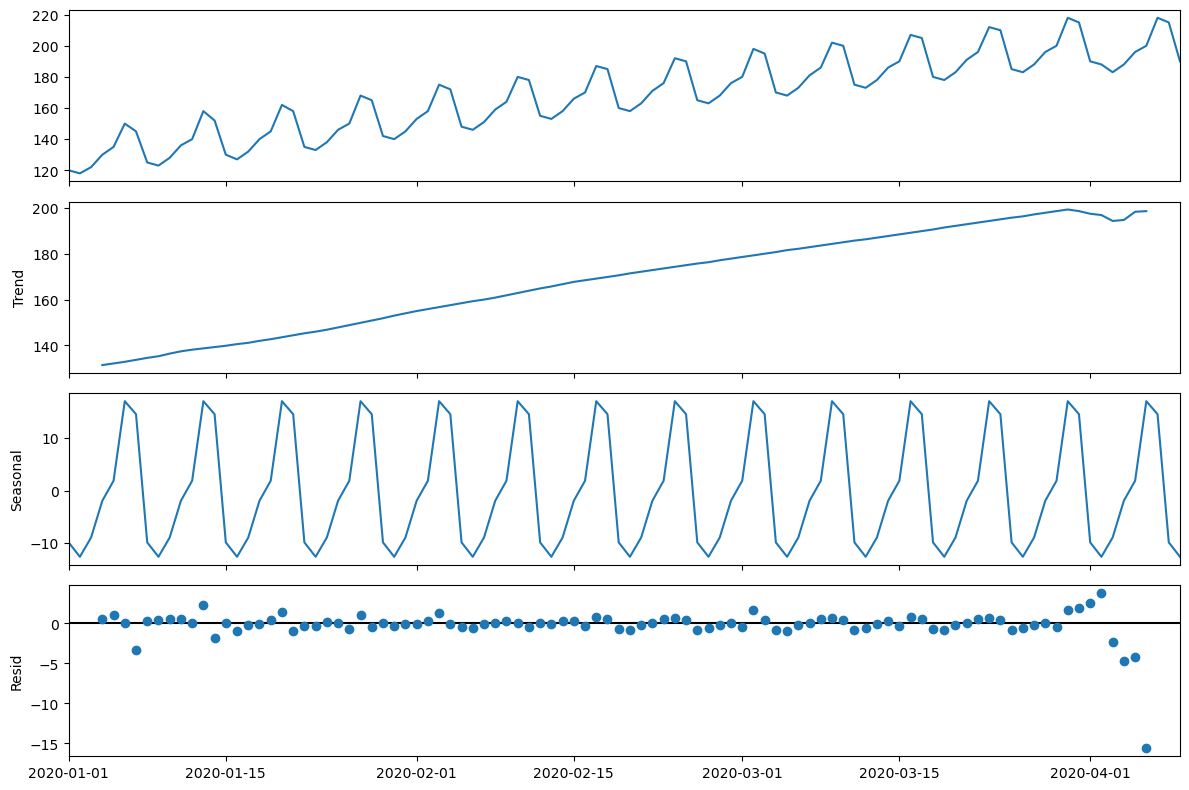

In [4]:
from matplotlib import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
# create sample time series data
date_range = pd.date_range(start="2020-01-01", periods=100, freq="D")
values = [
    120, 118, 122, 130, 135, 150, 145,
    125, 123, 128, 136, 140, 158, 152,
    130, 127, 132, 140, 145, 162, 158,
    135, 133, 138, 146, 150, 168, 165,
    142, 140, 145, 153, 158, 175, 172,
    148, 146, 151, 159, 164, 180, 178,
    155, 153, 158, 166, 170, 187, 185,
    160, 158, 163, 171, 176, 192, 190,
    165, 163, 168, 176, 180, 198, 195,
    170, 168, 173, 181, 186, 202, 200,
    175, 173, 178, 186, 190, 207, 205,
    180, 178, 183, 191, 196, 212, 210,
    185, 183, 188, 196, 200, 218, 215,
    190, 188,183, 188, 196, 200, 218,
    215,190
]

df_aa = pd.Series(
    values,
    index=date_range
)
rcParams['figure.figsize'] = (12, 8)

decomposed = seasonal_decompose(
    df_aa,
    model='additive',
    period=7   # important: specify season length
)

decomposed.plot()
plt.show()


# Mean Absolute Percentage Error

Measures the average percentage error between forecast and actual values.
$$ 
\Large \text{MAPE} = \frac{100\%}{n} \sum_{t=1}^{n} \left| \frac{X_t - F_t}{X_t} \right|
$$ 

# Deterministic vs Stochastic Models

- Deterministic : Once the parameters are fixed, the forecast is completely determined by past observations & No explicit modeling of randomness.
- Stochastic: The data generating process explicitly includes a random error term. Forecasts are distributions, not just point values.

# Backshift Operator & Differencing

The backshift operator B shifts a time series back by one time period. 

$$
B X_t = X_{t-1}
$$

$$
B^k X_t = X_{t-k}
$$

First order Differencing : removes the linear trend. This is the most common differencing used in ARIMA (d=1). Measures change in level. $\Delta X_t = X_t - X_{t-1}$. 

Using backshift operator ; $\Delta X_t = (1 - B) X_t$
Second order differencing: $\Delta^2 X_t = \Delta(\Delta X_t)$

Simplied Form : $\Delta^2 X_t = X_t - 2X_{t-1} + X_{t-2}$

Using Backshift Operator : $\Delta^2 X_t = (1 - B)^2 X_t$
General Differencing Term : $\Delta^d X_t = (1 - B)^d X_t$

When we apply differencing on a series like 101,104, 112,… like this (example) . The absolute baseline value is gone. Only changes remain. This is why differenced series oscillates around zero. 

Original series (X_t):
[101, 104, 112, 118, 125, 133, 140, 150, 158, 167]

Backshifted series (B X_t):
[101, 104, 112, 118, 125, 133, 140, 150, 158]

First difference (ΔX_t):
[3, 8, 6, 7, 8, 7, 10, 8, 9]

Second difference (Δ²X_t):
[5, -2, 1, 1, -1, 3, -2, 1]


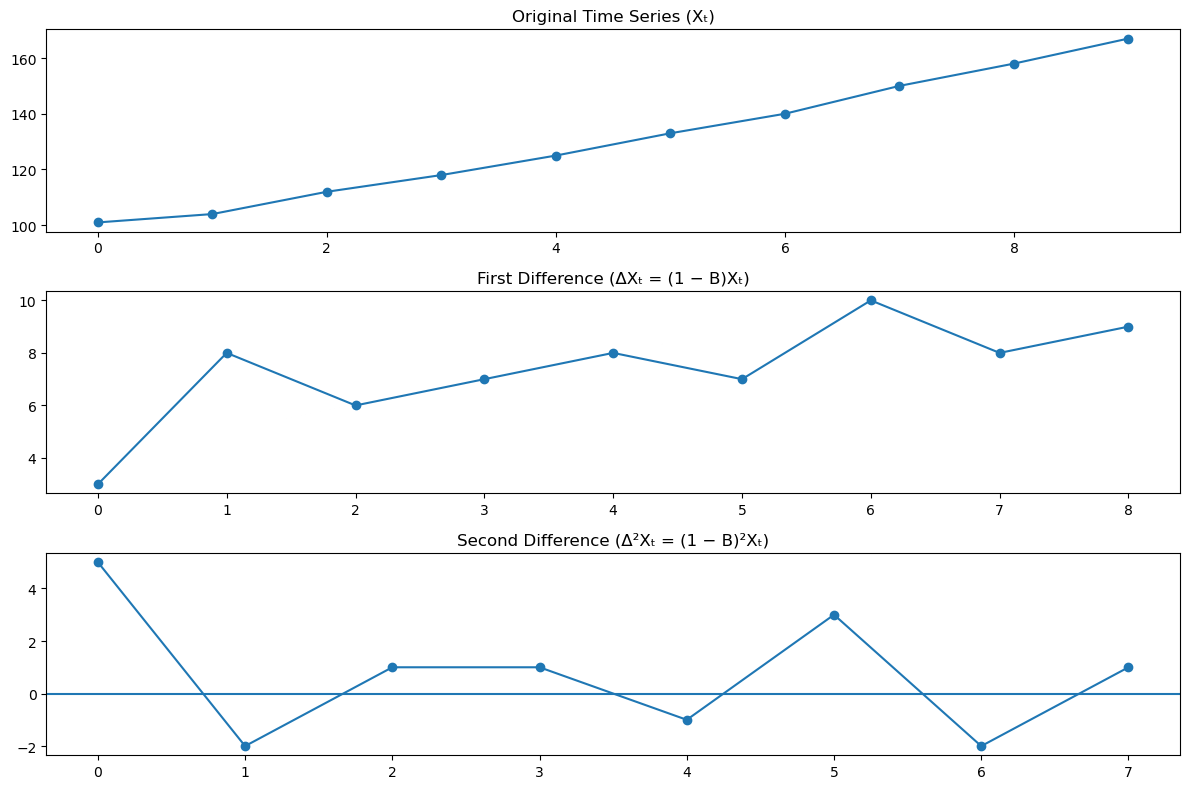

In [5]:
import matplotlib.pyplot as plt

# ------------------------------
# 1. Example time series
# ------------------------------
X = [101, 104, 112, 118, 125, 133, 140, 150, 158, 167]

# ------------------------------
# 2. Backshift operator
# ------------------------------
def backshift(series, k=1):
    return series[:-k]

# ------------------------------
# 3. First-order differencing
# ΔX_t = X_t - X_{t-1} = (1 - B)X_t
# ------------------------------
def first_difference(series):
    diff = []
    for i in range(1, len(series)):
        diff.append(series[i] - series[i - 1])
    return diff

# ------------------------------
# 4. Second-order differencing
# Δ²X_t = X_t - 2X_{t-1} + X_{t-2}
# ------------------------------
def second_difference(series):
    diff2 = []
    for i in range(2, len(series)):
        diff2.append(series[i] - 2 * series[i - 1] + series[i - 2])
    return diff2

# ------------------------------
# 5. Apply operations
# ------------------------------
BX = backshift(X)
diff_1 = first_difference(X)
diff_2 = second_difference(X)

# ------------------------------
# 6. Print values
# ------------------------------
print("Original series (X_t):")
print(X)

print("\nBackshifted series (B X_t):")
print(BX)

print("\nFirst difference (ΔX_t):")
print(diff_1)

print("\nSecond difference (Δ²X_t):")
print(diff_2)

# ------------------------------
# 7. Plot results
# ------------------------------
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(X, marker='o')
plt.title("Original Time Series (Xₜ)")

plt.subplot(3, 1, 2)
plt.plot(diff_1, marker='o')
plt.title("First Difference (ΔXₜ = (1 − B)Xₜ)")

plt.subplot(3, 1, 3)
plt.plot(diff_2, marker='o')
plt.axhline(0)
plt.title("Second Difference (Δ²Xₜ = (1 − B)²Xₜ)")

plt.tight_layout()
plt.show()


# What exactly is Trend of a Time Series ?

- Trend is the systematic, long-term movement of the level over time. It answers : Is the baseline drifting up, down, or staying flat?
- In a linear model : $X_t = a + bt + \epsilon_t$; a is the baseline. b is trend( average change per time unit) and epsilon is the noise.
- But trend can also be piecewise, nonlinear, stochastic ( random walk with drift)
- Deterministic Trend
    - The trend is fixed and predictable, like a straight line ( or a polynomial). Differencing removes this trend, but you could also remove it by regression de-trending.
- Stochastic Trend
    - The trend is random and cumulative - it depends on past shocks. Random walk with drift  $X_t = X_{t-1} + c + \epsilon_t$
    - Trend is accumulated random shocks, slope is not fixed.
    - Most economic time series have stochastic trends.

# White Noise

A special case of a stationary series with the following properties;

- Mean = 0 ( or constant )
- Variance = constant over time
- No autocorrelation:  $Cov(X_t,X_{t-k}) = 0 ; \forall k ≠0$

Every observation is completely random, independent of past values. No memory → Unpredictable. 

Examples are random shocks, coin flips, Gaussian noise. White noise is stationary ( means and variance constant), but it is not predictable because past values give no information about future values.

# Forecasting Methods

- Expanding Forecast : Model is trained on an increasing window of data, includes all past observations up to current point. - Computationally expensive, History is important
- Rolling Forecast : Recursive, actual value from the previous period is used for next prediction.
- Simple Moving Average : Average of fixed number of past observations. Each observation is given equal weight
- Weighted Moving Average : Giving more importance to recent values.

# Exponential Smoothing

## Simple Exponential Smoothing

Generates predictions by taking a weighted average of past observations, where the weights decrease exponentially over time. 


\begin{align*}
\LARGE \hat{y}_{t+1} = \alpha y_t + (1-\alpha)\hat{y_t}
\end{align*}

Assumes no trend or seasonality. Good for short term forecast.

In [6]:
data = [
    120, 118, 122, 130, 135, 150, 145,
    125, 123, 128, 136, 140, 158, 152,
    130, 127, 132, 140, 145, 162
]

In [7]:
def simple_exponential_smoothing(data, alpha):
    smoothed = []
    
    # initialize with first value
    smoothed.append(data[0])

    for t in range(1, len(data)):
        s_t = alpha * data[t] + (1 - alpha) * smoothed[t - 1]
        smoothed.append(s_t)

    return smoothed

In [8]:
alpha = 0.3  # smoothing factor
smoothed_values = simple_exponential_smoothing(data, alpha)

for i in range(len(data)):
    print(f"t={i:2d} | actual={data[i]:6.1f} | smoothed={smoothed_values[i]:6.2f}")


t= 0 | actual= 120.0 | smoothed=120.00
t= 1 | actual= 118.0 | smoothed=119.40
t= 2 | actual= 122.0 | smoothed=120.18
t= 3 | actual= 130.0 | smoothed=123.13
t= 4 | actual= 135.0 | smoothed=126.69
t= 5 | actual= 150.0 | smoothed=133.68
t= 6 | actual= 145.0 | smoothed=137.08
t= 7 | actual= 125.0 | smoothed=133.45
t= 8 | actual= 123.0 | smoothed=130.32
t= 9 | actual= 128.0 | smoothed=129.62
t=10 | actual= 136.0 | smoothed=131.54
t=11 | actual= 140.0 | smoothed=134.08
t=12 | actual= 158.0 | smoothed=141.25
t=13 | actual= 152.0 | smoothed=144.48
t=14 | actual= 130.0 | smoothed=140.13
t=15 | actual= 127.0 | smoothed=136.19
t=16 | actual= 132.0 | smoothed=134.94
t=17 | actual= 140.0 | smoothed=136.45
t=18 | actual= 145.0 | smoothed=139.02
t=19 | actual= 162.0 | smoothed=145.91


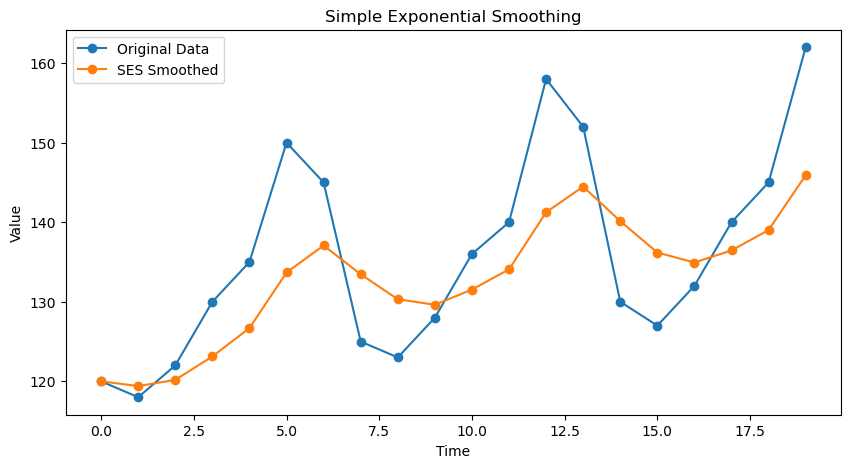

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(data, label="Original Data", marker='o')
plt.plot(smoothed_values, label="SES Smoothed", marker='o')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Simple Exponential Smoothing")
plt.show()


In [10]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(data)
fit = model.fit(smoothing_level=0.3, optimized=False)

print(fit.fittedvalues)

[120.         120.         119.4        120.18       123.126
 126.6882     133.68174    137.077218   133.4540526  130.31783682
 129.62248577 131.53574004 134.07501803 141.25251262 144.47675883
 140.13373118 136.19361183 134.93552828 136.4548698  139.01840886]


## Holtz Linear Trend

Simple Exponential smoothing is great for stationary series ( no trend, no seasonality). But what if the data has a trend? 

Holtz linear trend adds a trend component into the forecast

- Level (L_t) : current value of the series after adjusting for trend. It combines today’s actual value and yesterday’s forecasted level + trend
- Trend (T_t): average change per period ( the slope). Calculated as a smoothed difference between the new level and the previous level.

\begin{equation}
\LARGE L_t = \alpha X_t + (1 - \alpha)(L_{t-1} + T_{t-1})
\end{equation}

\begin{equation}
\LARGE T_t = \beta (L_t - L_{t-1}) + (1 - \beta) T_{t-1}
\end{equation}

\begin{equation}
\LARGE \hat{X}_{t+h} = L_t + hT_t
\end{equation}


In [11]:
data = [
    120, 118, 122, 130, 135, 150, 145,
    148, 152, 158, 162, 168, 172, 178
]
def holt_linear_trend(data, alpha, beta):
    level = data[0]
    trend = data[1] - data[0]

    levels = [level]
    trends = [trend]
    fitted = [level]

    for t in range(1, len(data)):
        prev_level = level
        prev_trend = trend

        level = alpha * data[t] + (1 - alpha) * (prev_level + prev_trend)
        trend = beta * (level - prev_level) + (1 - beta) * prev_trend

        levels.append(level)
        trends.append(trend)
        fitted.append(level + trend)

    return fitted, levels, trends


In [12]:
alpha = 0.4
beta = 0.3

fitted, levels, trends = holt_linear_trend(data, alpha, beta)

for i in range(len(data)):
    print(f"t={i:2d} | actual={data[i]:6.1f} | fitted={fitted[i]:6.2f}")

t= 0 | actual= 120.0 | fitted=120.00
t= 1 | actual= 118.0 | fitted=116.00
t= 2 | actual= 122.0 | fitted=117.12
t= 3 | actual= 130.0 | fitted=122.54
t= 4 | actual= 135.0 | fitted=129.28
t= 5 | actual= 150.0 | fitted=141.82
t= 6 | actual= 145.0 | fitted=147.72
t= 7 | actual= 148.0 | fitted=152.49
t= 8 | actual= 152.0 | fitted=156.90
t= 9 | actual= 158.0 | fitted=162.08
t=10 | actual= 162.0 | fitted=166.77
t=11 | actual= 168.0 | fitted=172.14
t=12 | actual= 172.0 | fitted=176.94
t=13 | actual= 178.0 | fitted=182.35


In [13]:
forecast_next = levels[-1] + trends[-1]
print("\nNext time-step forecast:", round(forecast_next, 2))


Next time-step forecast: 182.35


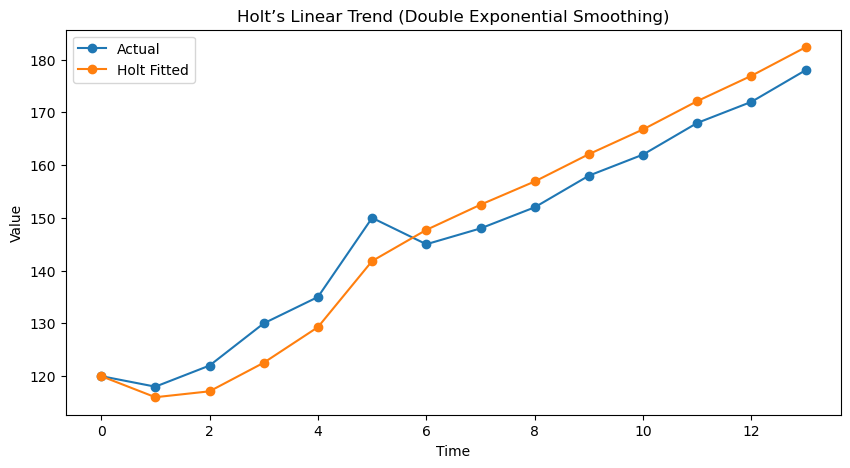

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(data, label="Actual", marker='o')
plt.plot(fitted, label="Holt Fitted", marker='o')
plt.legend()
plt.title("Holt’s Linear Trend (Double Exponential Smoothing)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

In-sample fitted values:
t= 0 | actual= 120.0 | fitted=118.00
t= 1 | actual= 118.0 | fitted=117.04
t= 2 | actual= 122.0 | fitted=115.78
t= 3 | actual= 130.0 | fitted=117.37
t= 4 | actual= 135.0 | fitted=123.04
t= 5 | actual= 150.0 | fitted=129.88
t= 6 | actual= 145.0 | fitted=142.39
t= 7 | actual= 148.0 | fitted=148.22
t= 8 | actual= 152.0 | fitted=152.88
t= 9 | actual= 158.0 | fitted=157.18
t=10 | actual= 162.0 | fitted=162.25
t=11 | actual= 168.0 | fitted=166.87
t=12 | actual= 172.0 | fitted=172.17
t=13 | actual= 178.0 | fitted=176.94

Forecast:
t+1: 182.32
t+2: 187.28
t+3: 192.24
t+4: 197.20
t+5: 202.16


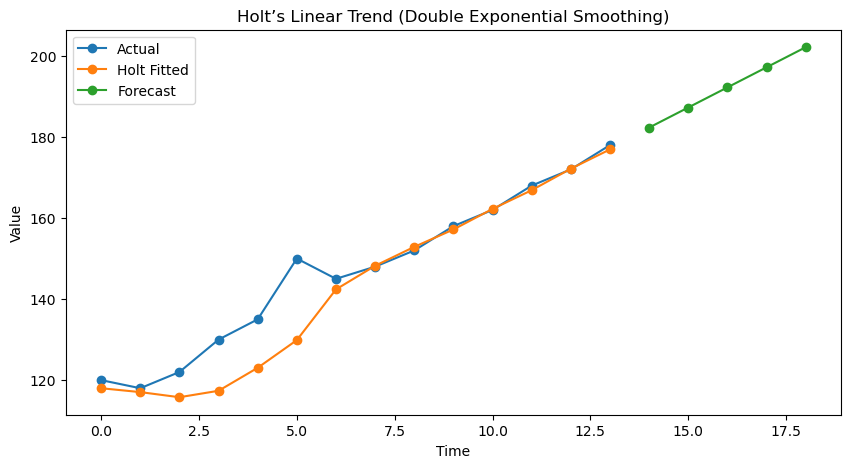

In [15]:
# ==============================
# Holt's Linear Trend (statsmodels)
# Complete Single Script
# ==============================

import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import Holt

# ------------------------------
# 1. Time series data
# ------------------------------
data = [
    120, 118, 122, 130, 135, 150, 145,
    148, 152, 158, 162, 168, 172, 178
]

# ------------------------------
# 2. Fit Holt’s Linear Trend model
# ------------------------------
alpha = 0.4  # level smoothing
beta = 0.3   # trend smoothing

model = Holt(
    data,
    exponential=False,    # linear trend
    damped_trend=False    # no damping
)

fit = model.fit(
    smoothing_level=alpha,
    smoothing_trend=beta,
    optimized=False       # keep alpha, beta fixed
)

# ------------------------------
# 3. Fitted (in-sample) values
# ------------------------------
fitted_values = fit.fittedvalues

print("In-sample fitted values:")
for t in range(len(data)):
    print(
        f"t={t:2d} | actual={data[t]:6.1f} | fitted={fitted_values[t]:6.2f}"
    )

# ------------------------------
# 4. Forecast future values
# ------------------------------
forecast_steps = 5
forecast = fit.forecast(forecast_steps)

print("\nForecast:")
for i, value in enumerate(forecast, 1):
    print(f"t+{i}: {value:.2f}")

# ------------------------------
# 5. Plot results
# ------------------------------
plt.figure(figsize=(10, 5))
plt.plot(data, label="Actual", marker='o')
plt.plot(fitted_values, label="Holt Fitted", marker='o')
plt.plot(
    range(len(data), len(data) + forecast_steps),
    forecast,
    label="Forecast",
    marker='o'
)
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Holt’s Linear Trend (Double Exponential Smoothing)")
plt.legend()
plt.show()


## Holtz Winters Seasonal Model

- Adding the seasonal component to holtz trend
- Additive Seasonality : for roughly constant seasonal swings
- Multiplicative Seasonality : for seasonal swings grow as the series grows.

$$
\begin{aligned}
\Large \text{Level: } L_t &= \Large \alpha X_t + (1-\alpha)(L_{t-1} + T_{t-1}) \\
\Large \text{Trend: } T_t &= \Large \beta (L_t - L_{t-1}) + (1-\beta) T_{t-1} \\
\Large \text{Forecast: } F_{t+m} &= \Large L_t + m T_t\end{aligned}
$$

- Observed = Level + Trend + Seasonality ( Additive)
- Observed = ( Level + Trend ) * Seasonality ( Multiplicative)

In-sample fitted values:
t= 0 | actual= 120.0 | fitted=118.00
t= 1 | actual= 118.0 | fitted=118.44
t= 2 | actual= 122.0 | fitted=116.56
t= 3 | actual= 130.0 | fitted=121.71
t= 4 | actual= 135.0 | fitted=132.12
t= 5 | actual= 150.0 | fitted=138.67
t= 6 | actual= 145.0 | fitted=156.47
t= 7 | actual= 148.0 | fitted=150.21
t= 8 | actual= 152.0 | fitted=151.46
t= 9 | actual= 158.0 | fitted=155.33
t=10 | actual= 162.0 | fitted=161.98
t=11 | actual= 168.0 | fitted=166.28
t=12 | actual= 172.0 | fitted=172.66
t=13 | actual= 178.0 | fitted=176.70

Forecast:
t+1: 182.91
t+2: 187.97
t+3: 193.03
t+4: 198.09
t+5: 203.15


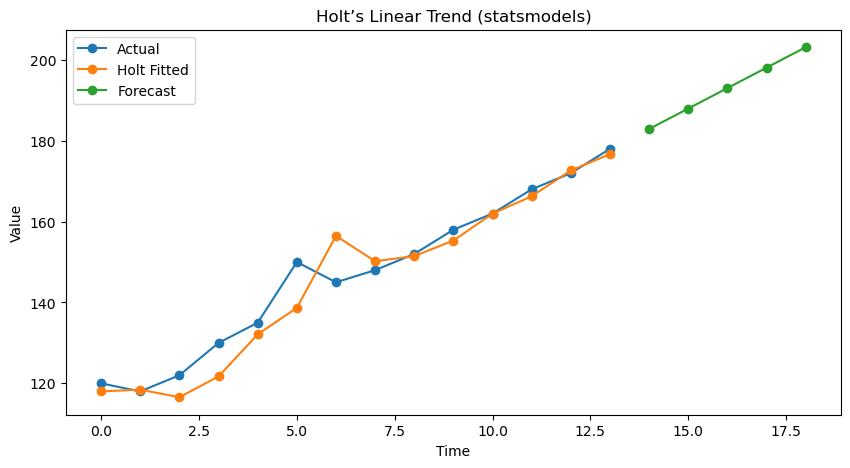

In [16]:
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import Holt

# Time series data
data = [
    120, 118, 122, 130, 135, 150, 145,
    148, 152, 158, 162, 168, 172, 178
]

# Fit Holt's Linear Trend model
model = Holt(data, exponential=False, damped_trend=False)
fit = model.fit(optimized=True)

# In-sample fitted values
fitted_values = fit.fittedvalues

# Forecast future values
forecast_steps = 5
forecast = fit.forecast(forecast_steps)

# Print results
print("In-sample fitted values:")
for t in range(len(data)):
    print(f"t={t:2d} | actual={data[t]:6.1f} | fitted={fitted_values[t]:6.2f}")

print("\nForecast:")
for i, value in enumerate(forecast, 1):
    print(f"t+{i}: {value:.2f}")

# Plot
plt.figure(figsize=(10, 5))
plt.plot(data, label="Actual", marker='o')
plt.plot(fitted_values, label="Holt Fitted", marker='o')
plt.plot(
    range(len(data), len(data) + forecast_steps),
    forecast,
    label="Forecast",
    marker='o'
)
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Holt’s Linear Trend (statsmodels)")
plt.legend()
plt.show()


# Stationary Series

A stationary series satisfies ; 

- Mean is constant
- Variance is constant
- Auto-covariance depends only on lag, not time.
- That means past values give information about future values → Predictable
- This is the definition for weak stationarity. ARIMA models assume weak stationarity.
- A series X_t is strongly stationary if ;

$$
(X_{t_1}, X_{t_2}, \dots, X_{t_k}) \; \overset{d}{=} \; (X_{t_1 + h}, X_{t_2 + h}, \dots, X_{t_k + h}) \quad \forall h, k
$$

- Any collection of values from the series, no matter which time you pick, has the same statistical behavior as the same length collection later in time.
- In **weak stationarity** : only mean, variance, covariance matter
- In **strong stationarity** : the entire shape of the distribution is unchanged.

# Dickey Fuller Test

Check whether a time series has a unit root ( stochastic trend ) or not. 

Null hypothesis : Non-stationary

$$
\begin{align*}
\Large X_t = \phi X_{t-1} +\epsilon_t\\ 
\Large\Delta X_t = X_t-X_{t-1}\\ 
\Large\Delta X_t = \delta X_{t-1} + \epsilon_t ; \delta = \phi -1\end{align*}
$$

If delta =0 , we have unit root → Non-stationary

Expression with drift ; 

$$
\LARGE \Delta X_t = \alpha + \delta X_{t-1} + \varepsilon_t
$$

- Regress $\Delta X_t$ on lagged level $X_{t-1}$ ( plus optional terms)
- Examine the coefficient $\delta$



# Augmented Dickey Fuller Test

$$
\Large \Delta X_t = \alpha + \beta t + \delta X_{t-1} + \sum_{i=1}^{p} \gamma_i \Delta X_{t-i} + \varepsilon_t
$$

- The Augmented Dickey-Fuller test extends the basic Dickey-Fuller by including lagged differences of the series to remove autocorrelation in residuals. The coefficient of the lagged level, δ, remains the key parameter: if it is significantly negative, we reject the unit root null hypothesis and conclude that the series is stationary
- $X_{t-1}$ coefficient (δ) → the unit root check
    
    This is the only coefficient that tells us whether the series pulls back to mean (stationary) or wanders (unit root)
    
- The lagged differences are there just to make the $\delta$ estimate reliable.


In [17]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# ------------------------------
# 1. Example time series
# ------------------------------
# Random walk (non-stationary)
np.random.seed(42)
n = 50
X = np.cumsum(np.random.normal(loc=0, scale=1, size=n))  # cumulative sum → trend

# Convert to pandas Series
ts = pd.Series(X)

# ------------------------------
# 2. Augmented Dickey-Fuller (ADF) test
# ------------------------------
adf_result = adfuller(ts)

print("Augmented Dickey-Fuller Test")
print("-----------------------------")
print(f"ADF Statistic: {adf_result[0]:.4f}")
print(f"p-value: {adf_result[1]:.4f}")
print(f"Used Lag: {adf_result[2]}")
print(f"Number of Observations: {adf_result[3]}")
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value:.4f}")

# ------------------------------
# 3. Interpretation
# ------------------------------
if adf_result[1] < 0.05:
    print("\nResult: Reject H0 → Time series is stationary")
else:
    print("\nResult: Fail to reject H0 → Time series is non-stationary")


Augmented Dickey-Fuller Test
-----------------------------
ADF Statistic: 0.1379
p-value: 0.9686
Used Lag: 0
Number of Observations: 49
Critical Values:
   1%: -3.5715
   5%: -2.9226
   10%: -2.5993

Result: Fail to reject H0 → Time series is non-stationary


In [18]:
# Stationary example
ts_stationary = pd.Series(np.random.normal(loc=0, scale=1, size=n))
adf_result_stat = adfuller(ts_stationary)
print("\nStationary Series ADF Test p-value:", adf_result_stat[1])


Stationary Series ADF Test p-value: 3.188157037570126e-11


# Transformation

## Log Transformation

- Most of the transformation affect the variance of the time series.
- If the variance grows as the series grows we can use log transformation
- Compresses large values
- Expand small values
- Makes variance roughly constant.
- Log transformations cannot be applied to zero values and negative values ( Use box-cox instead)

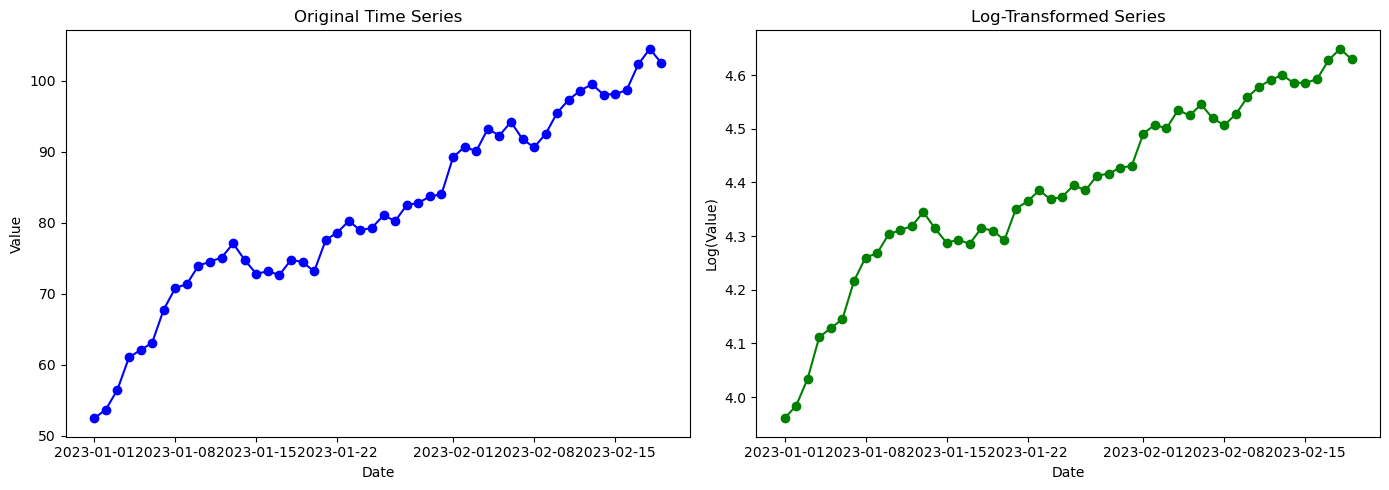

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------
# 1. Generate realistic time series
# ------------------------------
np.random.seed(42)
n = 50
time = pd.date_range(start="2023-01-01", periods=n, freq="D")

# Increasing series with multiplicative noise
X = np.cumsum(np.random.normal(loc=1.5, scale=2, size=n)) + 50
X = X.clip(min=1)  # avoid log(0)

ts = pd.Series(X, index=time)

# Log transformation
ts_log = np.log(ts)

# ------------------------------
# 2. Plot side by side
# ------------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Original series
axes[0].plot(ts, marker='o', color='blue')
axes[0].set_title("Original Time Series")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Value")

# Log-transformed series
axes[1].plot(ts_log, marker='o', color='green')
axes[1].set_title("Log-Transformed Series")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Log(Value)")

plt.tight_layout()
plt.show()



## Box - Cox Transformation

A transformation in general tries to rescale the vertical axis so that fluctuations look similar everywhere. Sometimes log transformation compresses too much or not enough. So Box-Cox says ; Let’s search across a family of transformations and pick the one that makes the data behave nicely. 

Box Cox applies a power transformation ; 

$$
\LARGE X \implies X^\lambda 
$$

$$
\LARGE Y_t =\begin{cases}\dfrac{X_t^{\lambda} - 1}{\lambda}, & \lambda \neq 0 \\\log(X_t), & \lambda = 0\end{cases}
$$

Smaller lambda gives more compression of large values. 

Even when applied to a single time series, Box–Cox implicitly assumes a simple model with constant mean and variance. The residuals are just deviations from the mean of the transformed series, and λ is chosen to make these deviations as close to Gaussian white noise as possible


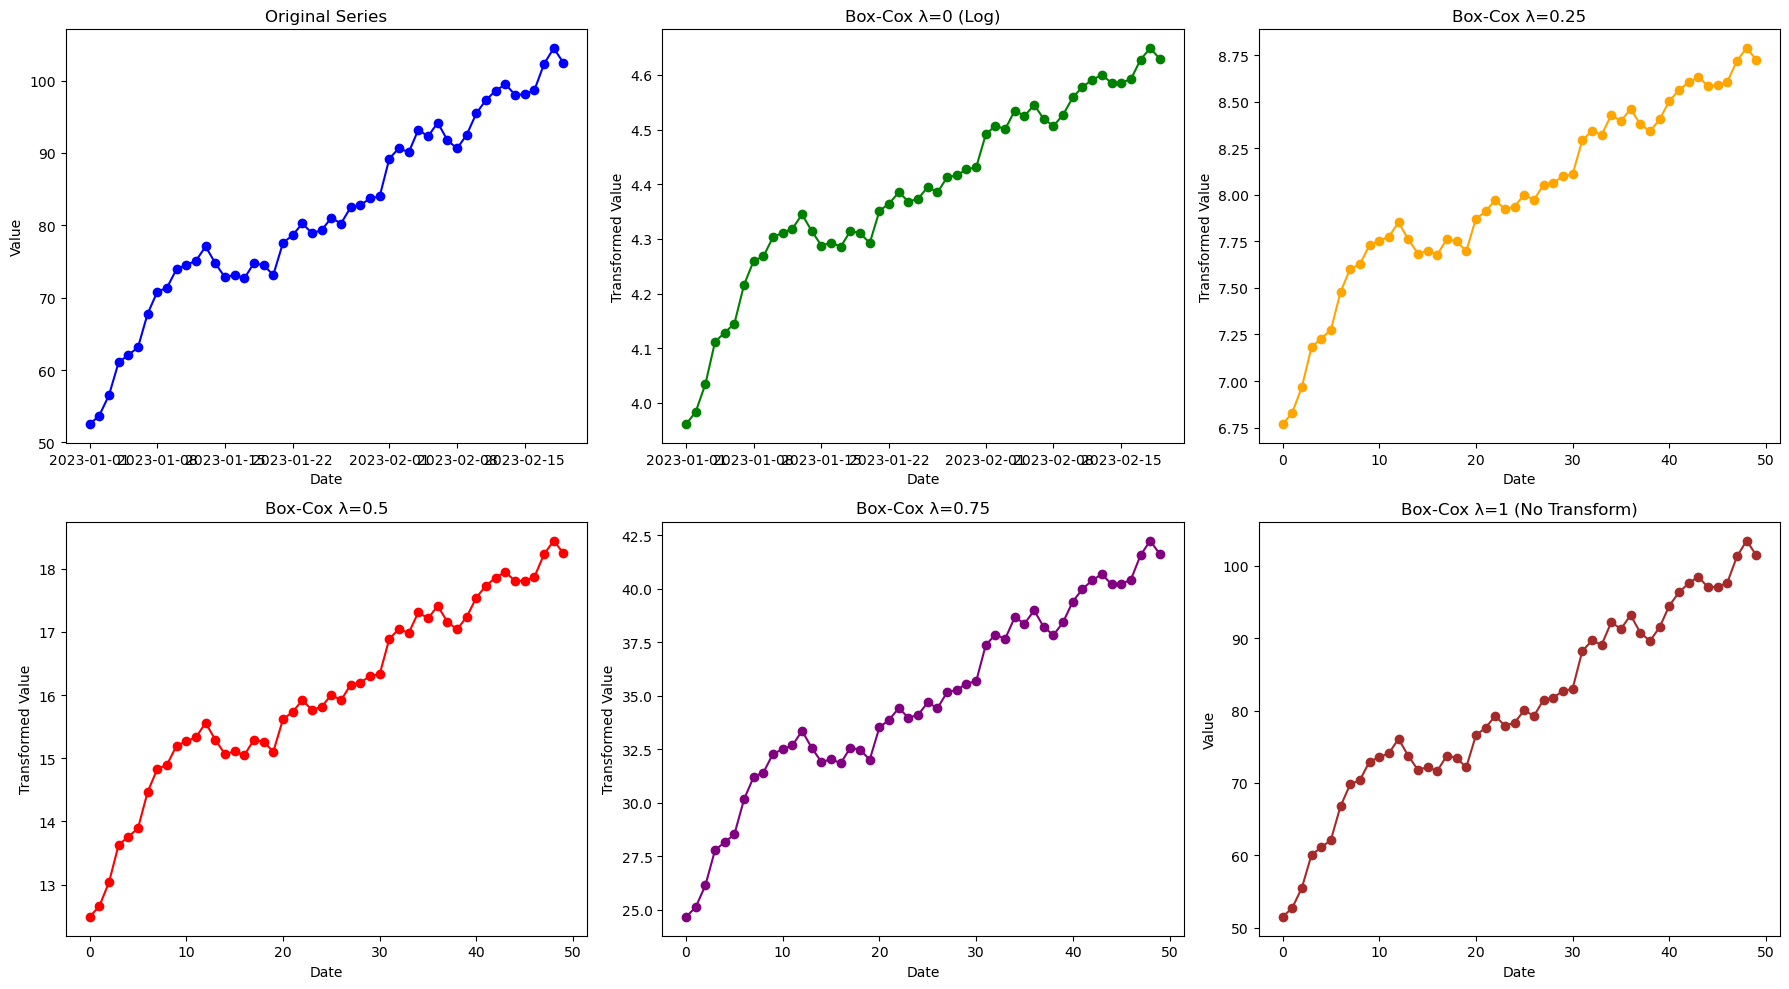

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import boxcox

# ------------------------------
# 1. Generate realistic time series
# ------------------------------
np.random.seed(42)
n = 50
time = pd.date_range(start="2023-01-01", periods=n, freq="D")

# Increasing series with multiplicative noise
X = np.cumsum(np.random.normal(loc=1.5, scale=2, size=n)) + 50
X = X.clip(min=0.01)  # avoid zero for Box-Cox

ts = pd.Series(X, index=time)

# ------------------------------
# 2. Box-Cox transformations with different lambdas
# ------------------------------
lambdas = [0, 0.25, 0.5, 0.75, 1]  # 0 = log, 1 = no transform
bc_transformed = []

for lam in lambdas:
    if lam == 0:
        bc_transformed.append(np.log(ts))
    else:
        bc_transformed.append(boxcox(ts, lmbda=lam))

# ------------------------------
# 3. Plot 6 subplots
# ------------------------------
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Original series
axes[0,0].plot(ts, marker='o', color='blue')
axes[0,0].set_title("Original Series")
axes[0,0].set_xlabel("Date")
axes[0,0].set_ylabel("Value")

# Log transform (lambda=0)
axes[0,1].plot(bc_transformed[0], marker='o', color='green')
axes[0,1].set_title("Box-Cox λ=0 (Log)")
axes[0,1].set_xlabel("Date")
axes[0,1].set_ylabel("Transformed Value")

# λ=0.25
axes[0,2].plot(bc_transformed[1], marker='o', color='orange')
axes[0,2].set_title("Box-Cox λ=0.25")
axes[0,2].set_xlabel("Date")
axes[0,2].set_ylabel("Transformed Value")

# λ=0.5
axes[1,0].plot(bc_transformed[2], marker='o', color='red')
axes[1,0].set_title("Box-Cox λ=0.5")
axes[1,0].set_xlabel("Date")
axes[1,0].set_ylabel("Transformed Value")

# λ=0.75
axes[1,1].plot(bc_transformed[3], marker='o', color='purple')
axes[1,1].set_title("Box-Cox λ=0.75")
axes[1,1].set_xlabel("Date")
axes[1,1].set_ylabel("Transformed Value")

# λ=1 (no transformation)
axes[1,2].plot(bc_transformed[4], marker='o', color='brown')
axes[1,2].set_title("Box-Cox λ=1 (No Transform)")
axes[1,2].set_xlabel("Date")
axes[1,2].set_ylabel("Value")

plt.tight_layout()
plt.show()


# ACF-PACF Plots
**Autocorrelation Function (ACF)** - The correlation of a time series with its own past values at different lags.This measures linear depeendence between $X_t$ and $X_{t-k}$ for lag k. 

\begin{align*}
\Large \text{ACF}(k) = \frac{Cov(X_t,X_{t-k})}{Var(X_t)}
\end{align*}

* Values range from -1 to 1
* Lag 0 : acf = 1 ( correlation with itself)
* Shows how past values affect current values
* Useful for identifying MA(q) proces. ACF cuts off after lag q , indicating MA(q)
* A gradual decay in ACF indicates AR process.


**Partial Autocorrelation Function ( pacf) ** - The correlation of $X_t$ with $X_{t-k}$ after removing the effects of intermediate lags 1,2,..., k-1. 
* Useful for idenfying AR(p) process- PACF cuts off after lag p , indicating AR(p) process.
* A gradual decay in PACF indicates MA process.


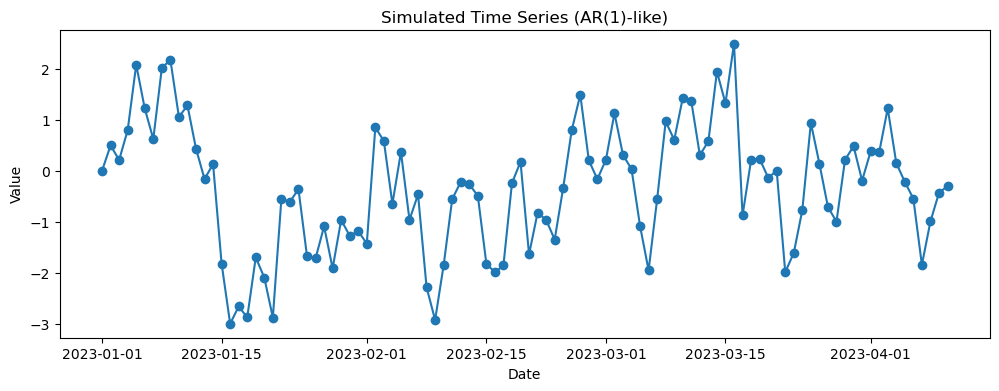

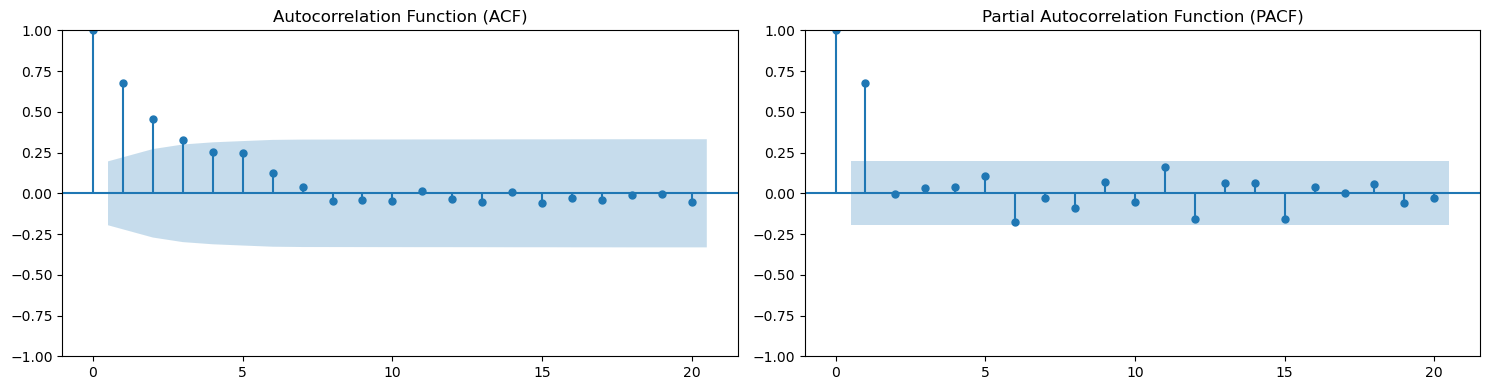

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ------------------------------
# 1. Generate realistic time series
# ------------------------------
np.random.seed(42)
n = 100
time = pd.date_range(start="2023-01-01", periods=n, freq="D")

# AR(1)-like series: X_t = 0.7*X_{t-1} + noise
X = [0]
for i in range(1, n):
    X.append(0.7 * X[-1] + np.random.normal(scale=1))
    
ts = pd.Series(X, index=time)

# ------------------------------
# 2. Plot original series
# ------------------------------
plt.figure(figsize=(12,4))
plt.plot(ts, marker='o')
plt.title("Simulated Time Series (AR(1)-like)")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()

# ------------------------------
# 3. Plot ACF and PACF
# ------------------------------
fig, axes = plt.subplots(1, 2, figsize=(15,4))

plot_acf(ts, ax=axes[0], lags=20)
axes[0].set_title("Autocorrelation Function (ACF)")

plot_pacf(ts, ax=axes[1], lags=20, method='ywm')  # 'ywm' works well for small series
axes[1].set_title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()

# ARIMA ( p, d, q)
**Auto Regressive Integrated Moving Average**


Linear , Stochastic time series model that explains the current value of a series using its past values, past errors ( after making the series stationary. ARIMA assumes the future is a linear function of the past, once trend is removed. 

$$
\Large y_t = c + \sum_{i=1}^{p} \phi_i y_{t-i} + \sum_{j=1}^{q}\theta_j \epsilon_{t-j} + \epsilon_t
$$

- c is the constant term
- $\phi$ part is Auto regressive component
- $\theta$ part is the Moving average component
- $\epsilon$ is the error
- **AR Component** : Current value is a linear combination of its past values. Coefficients  determine the weight given to lag of the series. AR part captures the pattern of autocorrelation within the series.
- **MA Component** : Models dependency between the current value and the past error terms. Coefficients determine the impact of the errors. It captures the pattern of error correlation in the series. Assumes that the current value is influenced by the unexpected shocks ( errors) from previous observations.
- Error Term : Represents the random noise or unpredictable part. Assumed to be white noise. ( Zero mean, constant variance and no autocorrelation)
- Constant Term - Baseline value. In stationary series this is often close to zero. In non stationary series ( after differencing) it captures the average change or trend.
- ACF - Autocorrelation Function → Identify the MA(q) terms.
- PACF - Partial Autocorrelation Function → Identify the AR(p) terms.
- Differencing to determine d. ( d=0 → already stationary, d=1 → remove linear trend, d=2 → remove quadratic trend)
- When does ARIMA fail ? Strong seasonality ( use SARIMA), Nonlinear patterns ( use ml/state-space models)

# SARIMA - (p,d,q) (P,D,Q)s
**Seasonal Autoregressive Integrated Moving Average**

ARIMA assumes no seasonality. Real-world time series often have monthly, quarterly, weekly, daily patterns. So ARIMA fails to capture repeating seasonal dependence. That’s why SARIMA exists. 

$$
\LARGE \text{SARIMA}(p,d,q) (P,D,Q)_s
$$

$$
\LARGE y_t = c + \sum_{i=1}^{p} \phi_i y_{t-i} + \sum_{j=1}^{q} \theta_j \epsilon_{t-j} + \sum_{I=1}^{P} \Phi_I y_{t-Is} + \sum_{J=1}^{Q} \Theta_J \epsilon_{t-Js} + \epsilon_t
$$

- $(p,d,q)$ → Non-seasonal components
- $(P,D,Q)$ → Seasonal components
- s → Seasonal Period ( For monthly data s will be 12, quarterly data s will be 4, weekly or daily data s will 7)

$$
\large \text{SARIMA} = \text{ARIMA on differenced data} + \text{ARIMA on seasonally differenced data} 
$$

- Non-seasonal terms → short-term dependence
- Seasonal terms → seasonal dependence.

# Time Series Forecasting Pipeline

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

from scipy.stats import boxcox
from scipy.special import inv_boxcox

## Plotting the time series 

In [23]:
np.random.seed(42)

dates = pd.date_range(start="2023-01-01", periods=120, freq="D")
trend = np.linspace(50, 95, len(dates))
seasonality = 5 * np.sin(2 * np.pi * dates.dayofweek / 7)
noise = np.random.normal(0, 2, len(dates))

values = trend + seasonality + noise
df = pd.DataFrame({
    "value": np.round(values, 2)
}, index=dates)

df.head()

,value
2023-01-01,47.08
2023-01-02,50.10
2023-01-03,55.96
2023-01-04,59.06
2023-01-05,53.21


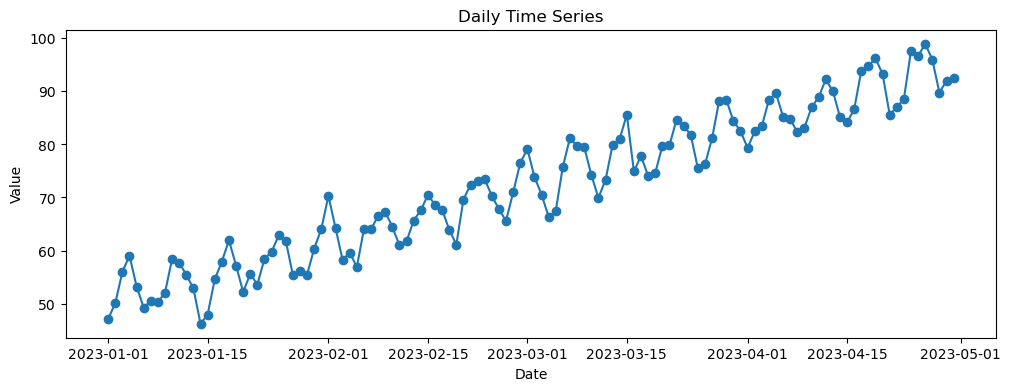

In [24]:
plt.figure(figsize=(12,4))
plt.plot(df.index, df["value"], marker="o")
plt.title("Daily Time Series")
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(False)
plt.show()

* upward trend along with weekly oscillations
* use additive decomposition first (because variance doesn’t explode with level)
* 

## Decomposition 

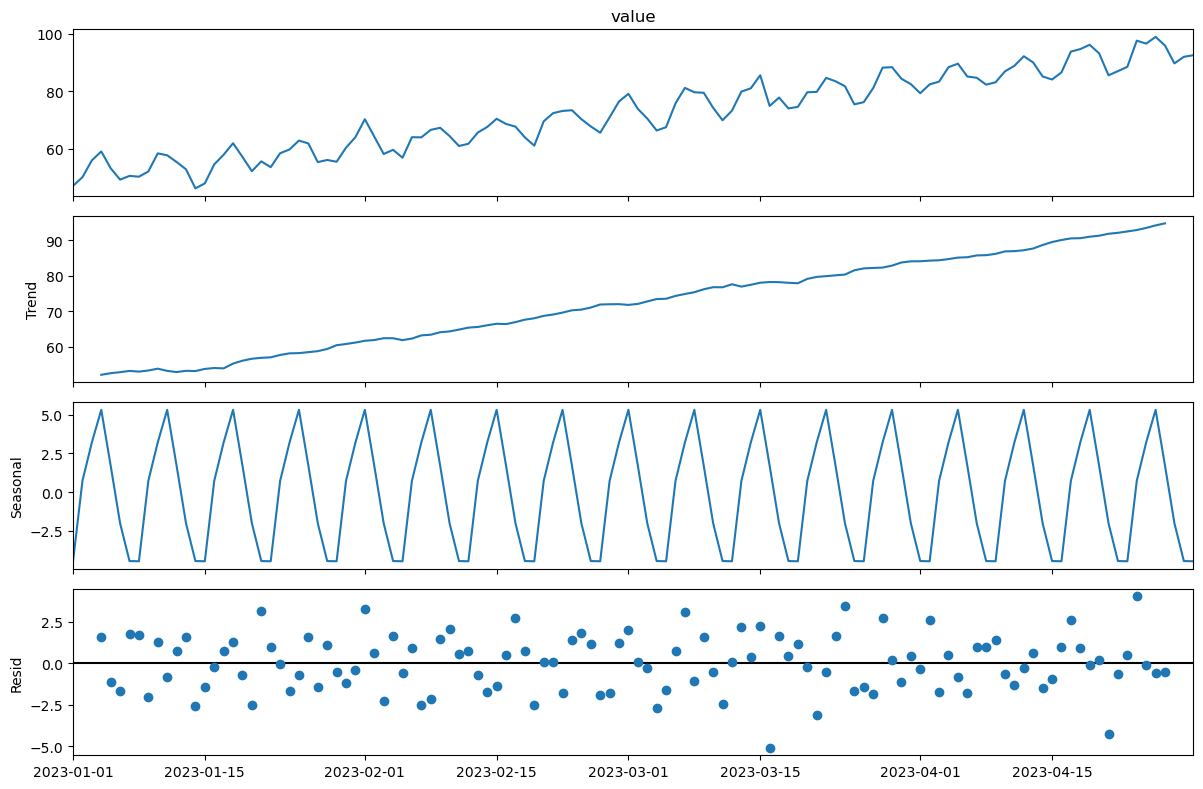

In [25]:
decomp_add = seasonal_decompose(df["value"], model="additive", period=7)

decomp_add.plot()
plt.show()


* Trend: smooth, increasing → non-stationary
* Seasonality: stable weekly pattern
* Residuals: centered, no obvious structure

## Stationarity Check

In [26]:
def adf_test(series, title=""):
    result = adfuller(series)
    print(f"ADF Test: {title}")
    print(f"ADF Statistic : {result[0]:.4f}")
    print(f"p-value       : {result[1]:.4f}")
    print("Stationary " if result[1] < 0.05 else "Non-stationary ")
    print("-" * 40)

In [27]:
adf_test(df["value"], "Raw Series")

ADF Test: Raw Series
ADF Statistic : 0.6847
p-value       : 0.9895
Non-stationary 
----------------------------------------


## Differencing & Transformation

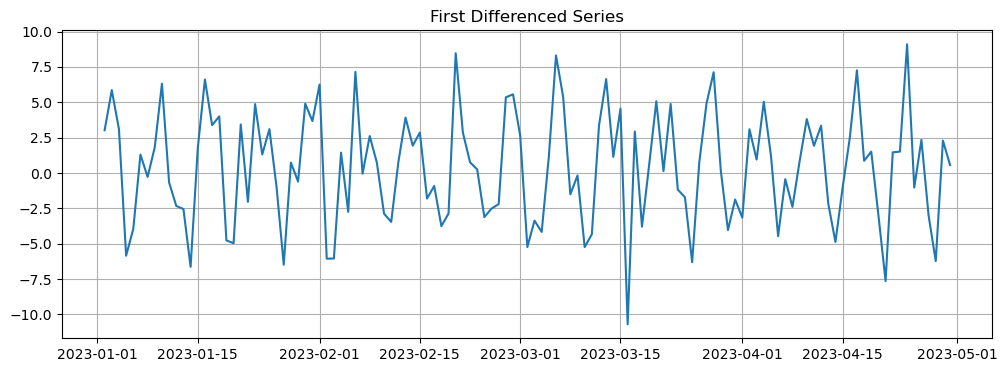

ADF Test: 1st Difference
ADF Statistic : -5.4951
p-value       : 0.0000
Stationary 
----------------------------------------


In [28]:
df["diff_1"] = df["value"].diff()

plt.figure(figsize=(12,4))
plt.plot(df["diff_1"])
plt.title("First Differenced Series")
plt.grid(True)
plt.show()

adf_test(df["diff_1"].dropna(), "1st Difference")


In [29]:
df["diff_2"] = df["diff_1"].diff()

adf_test(df["diff_2"].dropna(), "2nd Difference")

ADF Test: 2nd Difference
ADF Statistic : -5.6979
p-value       : 0.0000
Stationary 
----------------------------------------


In [30]:
df["value_bc"], lambda_bc = boxcox(df["value"])
print(f"Estimated Box-Cox lambda: {lambda_bc:.4f}")

adf_test(df["value_bc"], "Box-Cox Transformed")


Estimated Box-Cox lambda: 0.7705
ADF Test: Box-Cox Transformed
ADF Statistic : 0.0619
p-value       : 0.9634
Non-stationary 
----------------------------------------


In [31]:
ts_model = df["value"].diff().dropna()

## acf & pacf : getting the orders 

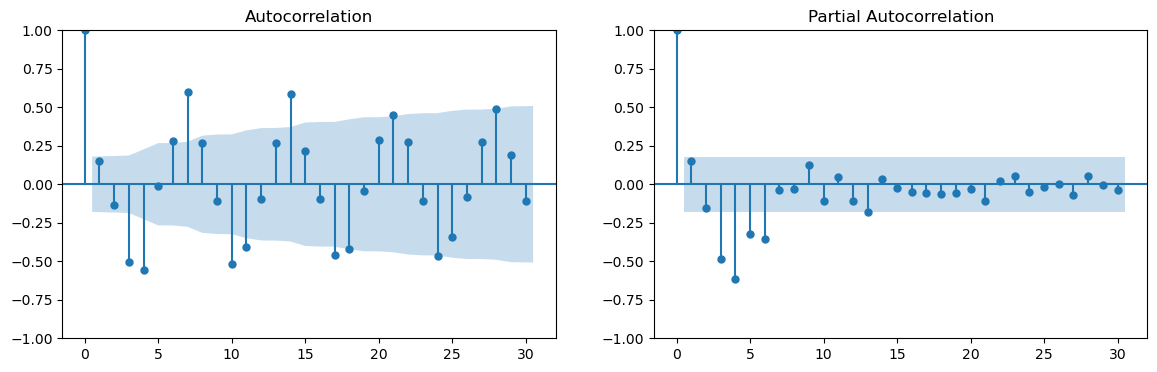

In [32]:
fig, axes = plt.subplots(1,2, figsize=(14,4))

plot_acf(ts_model, lags=30, ax=axes[0])
plot_pacf(ts_model, lags=30, method="ywm", ax=axes[1])

plt.show()

## Model Fitting

In [33]:
model = ARIMA(df["value"], order=(1,1,0))
fit = model.fit()

print(fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  120
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -332.217
Date:                Sat, 24 Jan 2026   AIC                            668.433
Time:                        16:22:08   BIC                            673.991
Sample:                    01-01-2023   HQIC                           670.690
                         - 04-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1546      0.103      1.508      0.132      -0.046       0.356
sigma2        15.5707      2.288      6.806      0.000      11.087      20.055
Ljung-Box (L1) (Q):                   0.04   Jarque-

In [34]:
# Forecast next 7 time steps
forecast_7 = fit.get_forecast(steps=7)

# Extract mean forecast and confidence intervals
forecast_df = pd.DataFrame({
    "forecast": forecast_7.predicted_mean,
    "lower_ci": forecast_7.conf_int().iloc[:, 0],
    "upper_ci": forecast_7.conf_int().iloc[:, 1]
})

forecast_df

,forecast,lower_ci,upper_ci
2023-05-01,92.676563,84.942601,100.410526
2023-05-02,92.689944,80.876842,104.503046
2023-05-03,92.692012,77.771591,107.612434
2023-05-04,92.692332,75.193472,110.191192
2023-05-05,92.692381,72.946952,112.437811
2023-05-06,92.692389,70.930809,114.453969
2023-05-07,92.692390,69.086190,116.298590


Your data has:
 * strong weekly seasonality (s = 7)
 * only non-seasonal differencing (d = 1) applied
 * ACF shows repeating spikes at lags 7, 14, 21
 * This means seasonal unit root still exists
 * ARIMA is under-differencing the series
This is exactly when SARIMA is needed.

In [35]:
df["value"].autocorr(lag=7)

np.float64(0.9823314957648692)

In [36]:
# applying seasonal differencing: 
# D = 1 with period s = 7
df["diff_seasonal"] = df["value"].diff(7)
df["diff_1_seasonal"] = df["diff_seasonal"].diff(1)

ts_sarima = df["diff_1_seasonal"].dropna()

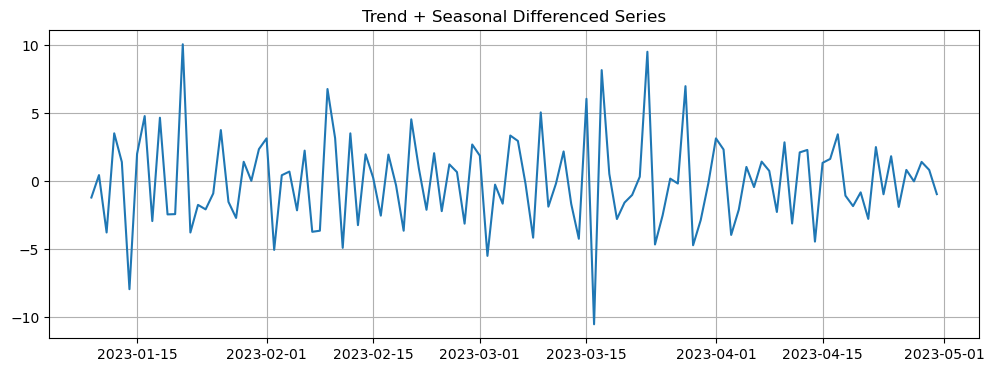

In [37]:
plt.figure(figsize=(12,4))
plt.plot(ts_sarima)
plt.title("Trend + Seasonal Differenced Series")
plt.grid(True)
plt.show()

In [38]:
adf_test(ts_sarima, "After d=1, D=1, s=7")

ADF Test: After d=1, D=1, s=7
ADF Statistic : -6.2528
p-value       : 0.0000
Stationary 
----------------------------------------


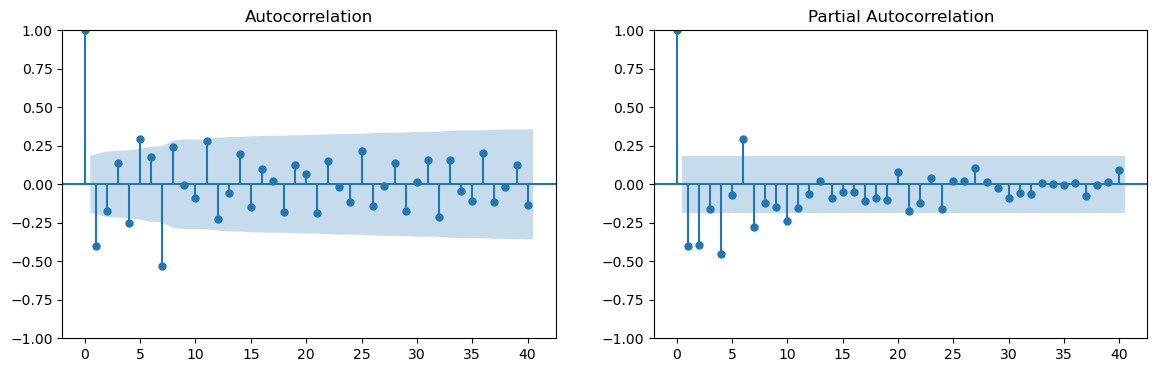

In [39]:
fig, axes = plt.subplots(1,2, figsize=(14,4))
plot_acf(ts_sarima, lags=40, ax=axes[0])
plot_pacf(ts_sarima, lags=40, method="ywm", ax=axes[1])
plt.show()

In [40]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(
    df["value"],
    order=(1,1,1),
    seasonal_order=(1,1,1,7),
    enforce_stationarity=False,
    enforce_invertibility=False
)

sarima_fit = sarima_model.fit()
print(sarima_fit.summary())


                                     SARIMAX Results                                     
Dep. Variable:                             value   No. Observations:                  120
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood                -217.409
Date:                           Sat, 24 Jan 2026   AIC                            444.818
Time:                                   16:22:10   BIC                            457.992
Sample:                               01-01-2023   HQIC                           450.154
                                    - 04-30-2023                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0533      0.128      0.417      0.677      -0.197       0.304
ma.L1         -1.0000    531.893     -0.002

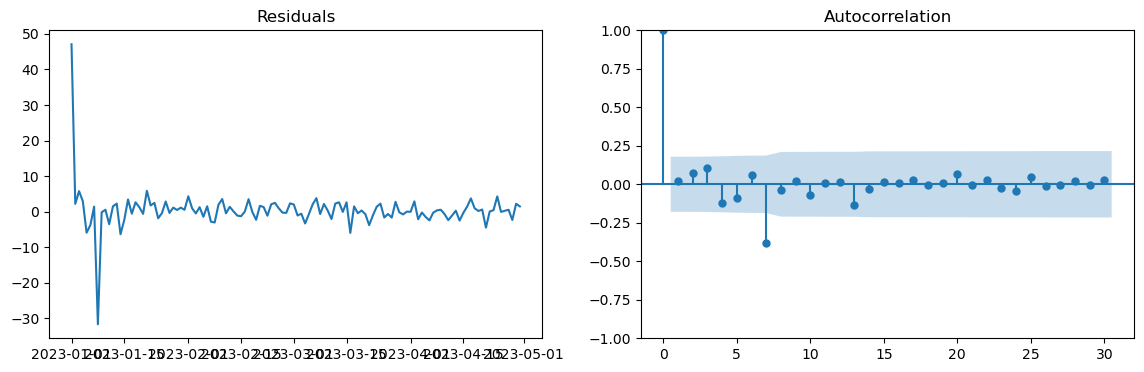

ADF Test: Residuals
ADF Statistic : -16.3024
p-value       : 0.0000
Stationary 
----------------------------------------


In [41]:
residuals = sarima_fit.resid

fig, axes = plt.subplots(1,2, figsize=(14,4))

axes[0].plot(residuals)
axes[0].set_title("Residuals")

plot_acf(residuals.dropna(), lags=30, ax=axes[1])

plt.show()

adf_test(residuals.dropna(), "Residuals")


In [42]:
# Forecast next 7 steps using SARIMA
sarima_forecast = sarima_fit.get_forecast(steps=7)

# Create pandas DataFrame
sarima_forecast_df = pd.DataFrame({
    "sarima_forecast": sarima_forecast.predicted_mean,
    "lower_ci": sarima_forecast.conf_int().iloc[:, 0],
    "upper_ci": sarima_forecast.conf_int().iloc[:, 1]
})

sarima_forecast_df


,sarima_forecast,lower_ci,upper_ci
2023-05-01,96.918002,93.165874,100.670130
2023-05-02,99.244930,95.483799,103.006060
2023-05-03,101.499115,97.737706,105.260525
2023-05-04,98.248511,94.486971,102.010051
2023-05-05,94.428793,90.667064,98.190522
2023-05-06,93.032854,89.270857,96.794851
2023-05-07,93.980672,90.218385,97.742959


In [43]:
# Forecast next 7 steps using SARIMA
sarima_forecast = sarima_fit.get_forecast(steps=7)

# Create pandas DataFrame
sarima_forecast_df = pd.DataFrame({
    "sarima_forecast": sarima_forecast.predicted_mean,
    "lower_ci": sarima_forecast.conf_int().iloc[:, 0],
    "upper_ci": sarima_forecast.conf_int().iloc[:, 1]
})

sarima_forecast_df


,sarima_forecast,lower_ci,upper_ci
2023-05-01,96.918002,93.165874,100.670130
2023-05-02,99.244930,95.483799,103.006060
2023-05-03,101.499115,97.737706,105.260525
2023-05-04,98.248511,94.486971,102.010051
2023-05-05,94.428793,90.667064,98.190522
2023-05-06,93.032854,89.270857,96.794851
2023-05-07,93.980672,90.218385,97.742959


* If we get new data : then we can either refit the model and predict next batch forecast or we can append the new data and forecast

In [44]:
# sarima_fit = sarima_fit.append(new_values)
# forecast_next7 = sarima_fit.get_forecast(steps=7)

## Residual Diagnostics in SARIMAX

In [45]:

# sarima_fit = SARIMAX(...).fit()
# In-sample residuals
residuals = sarima_fit.resid

# View first few residuals
print(residuals.head())


2023-01-01    47.080000
2023-01-02     2.184148
2023-01-03     5.757264
2023-01-04     2.941109
2023-01-05    -5.936837
Freq: D, dtype: float64


### Plotting the residuals

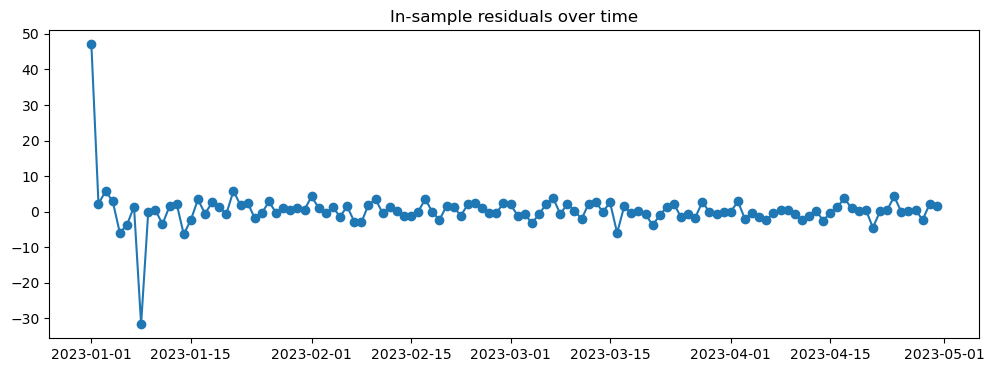

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(residuals, marker='o')
plt.title("In-sample residuals over time")
plt.show()

### ACF/Ljung-box Test for autocorrelation

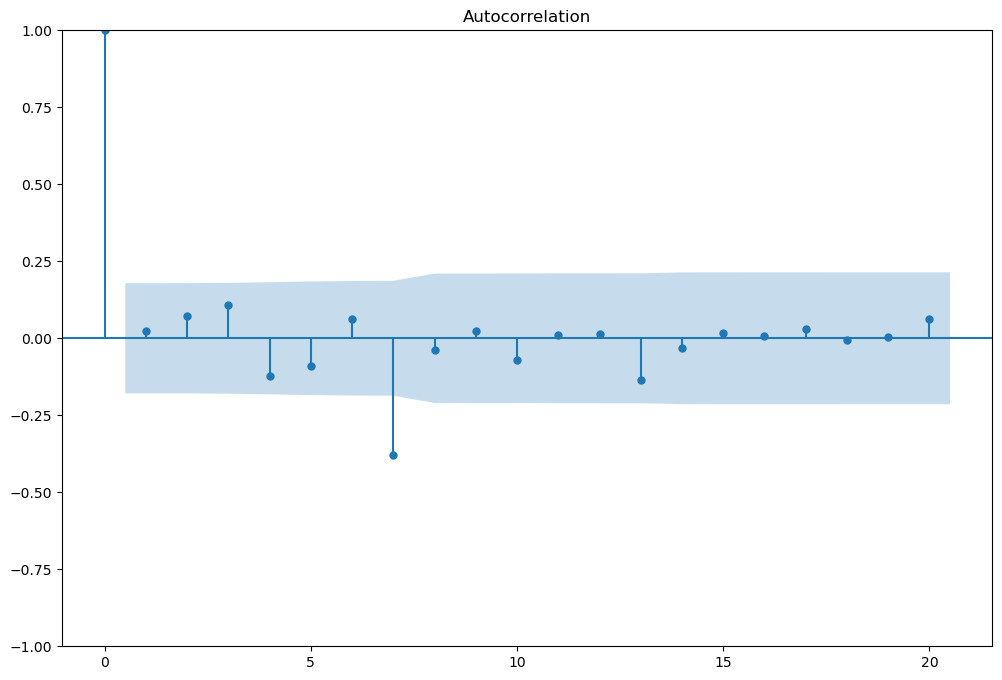

In [47]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(residuals, lags=20)
plt.show()

In [48]:
# Ljung-Box test (formal check for autocorrelation)
from statsmodels.stats.diagnostic import acorr_ljungbox

lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(lb_test)

      lb_stat  lb_pvalue
10  25.227939    0.00493


### Testing whether it has Mean=0

In [49]:
from scipy import stats
stats.ttest_1samp(residuals, 0)

TtestResult(statistic=np.float64(0.6867530915819797), pvalue=np.float64(0.4935744177121656), df=np.int64(119))

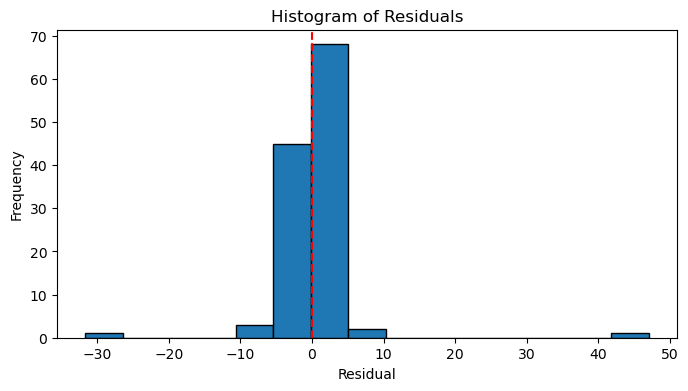

In [50]:
import matplotlib.pyplot as plt

# residuals = sarima_fit.resid
plt.figure(figsize=(8,4))
plt.hist(residuals, bins=15, edgecolor='k')
plt.title("Histogram of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.axvline(x=0, color='red', linestyle='--')  # Line at zero for reference
plt.show()


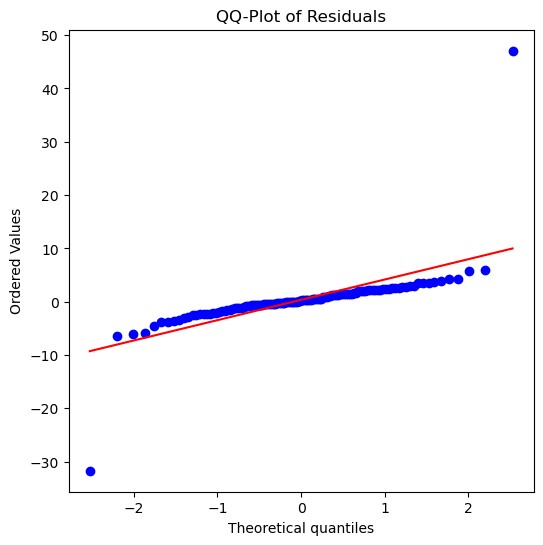

In [51]:
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ-Plot of Residuals")
plt.show()

### Residuals - Homoskedasticity

 * Goal: No systematic change in variance over time.
 * Visual: Plot residuals vs time. Look for increasing spread or “fan shape.”
 * Rolling variance check:

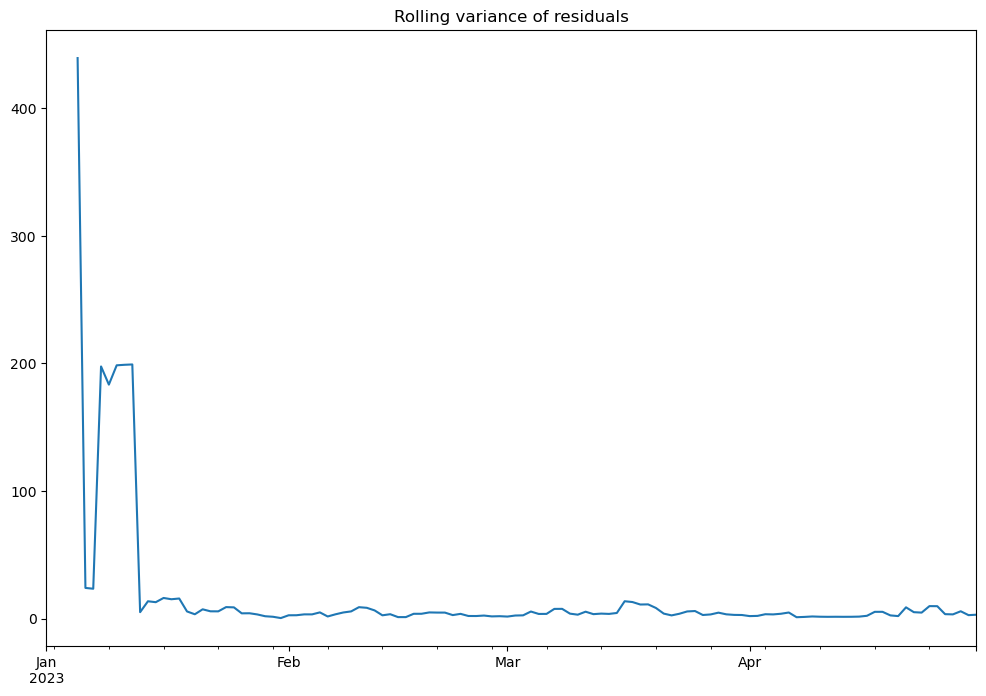

In [52]:
rolling_var = residuals.rolling(window=5).var()
rolling_var.plot(title="Rolling variance of residuals")
rcParams['figure.figsize'] = (8, 7)

In [53]:
from statsmodels.stats.diagnostic import het_arch
arch_test = het_arch(residuals)
print("ARCH test statistic, p-value:", arch_test)

ARCH test statistic, p-value: (np.float64(32.68353924913594), np.float64(0.00030781962681868374), 4.184969609629082, 7.593993067228864e-05)


### Residuals Distribution

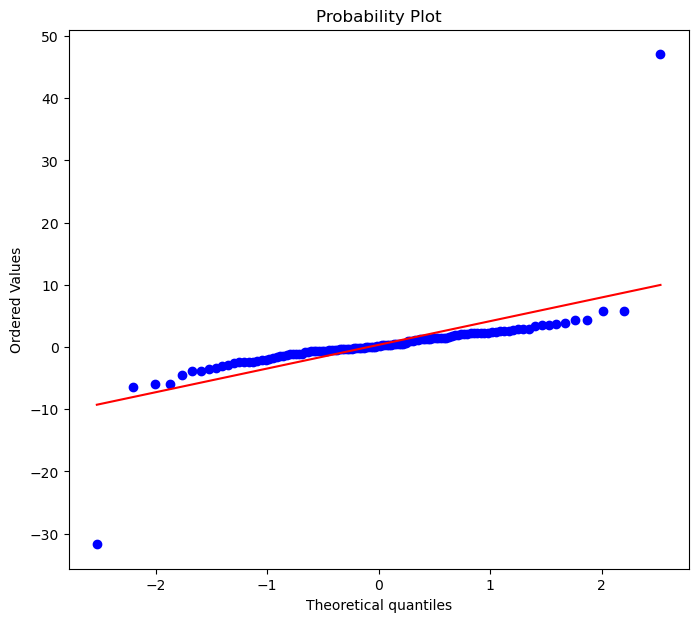

In [54]:
import scipy.stats as stats
import matplotlib.pyplot as plt
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()

# SARIMAX - Code Snippet

In [59]:
import pandas as pd
import numpy as np

# --------------------------
# 50 days of data
# --------------------------
dates = pd.date_range(start="2023-01-01", periods=50, freq="D")

# Sales: trend + weekly seasonality + random noise
np.random.seed(42)
trend = np.linspace(50, 100, 50)                       # increasing trend
seasonality = 5 * np.sin(2 * np.pi * np.arange(50)/7)  # weekly effect
noise = np.random.normal(0, 2, 50)                     # small random noise
sales = trend + seasonality + noise

# Promotion flag (0/1), roughly 1 every 3 days
promotion = [1 if i%3==0 else 0 for i in range(50)]

# Create DataFrame
df = pd.DataFrame({
    "sales": sales,
    "promotion": promotion
}, index=dates)

df.head()

,sales,promotion
2023-01-01,50.993428,1
2023-01-02,54.653037,0
2023-01-03,58.210833,0
2023-01-04,58.276703,1
2023-01-05,51.443907,0


In [60]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Model
sarimax_model = SARIMAX(
    df["sales"],
    exog=df["promotion"],
    order=(1,1,1),
    seasonal_order=(1,1,1,7),
    enforce_stationarity=False,
    enforce_invertibility=False
)

# Fit
sarimax_fit = sarimax_model.fit()

# Summary
print(sarimax_fit.summary())


                                     SARIMAX Results                                     
Dep. Variable:                             sales   No. Observations:                   50
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood                 -68.661
Date:                           Sat, 24 Jan 2026   AIC                            149.322
Time:                                   18:14:35   BIC                            158.301
Sample:                               01-01-2023   HQIC                           152.343
                                    - 02-19-2023                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
promotion      0.3730      0.508      0.734      0.463      -0.624       1.370
ar.L1          0.2697      0.352      0.766

In [61]:
# Future dates
future_dates = pd.date_range(start=df.index[-1]+pd.Timedelta(days=1), periods=7)

# Future promotion flags (example)
future_promo = [0,1,0,0,1,0,0]

# Forecast
forecast = sarimax_fit.get_forecast(steps=7, exog=future_promo)

# Create DataFrame
forecast_df = pd.DataFrame({
    "forecast": forecast.predicted_mean,
    "lower_ci": forecast.conf_int().iloc[:,0],
    "upper_ci": forecast.conf_int().iloc[:,1]
}, index=future_dates)

forecast_df


,forecast,lower_ci,upper_ci
2023-02-20,103.819990,100.135296,107.504684
2023-02-21,103.133498,99.294555,106.972440
2023-02-22,101.449411,97.593432,105.305390
2023-02-23,101.024795,97.165937,104.883654
2023-02-24,102.775283,98.915731,106.634835
2023-02-25,101.704946,97.845063,105.564829
2023-02-26,104.443621,100.583116,108.304126


# Prophet - Code Snippet

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from prophet import Prophet

from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [2]:
pjme = pd.read_csv('data/AEP_hourly.csv',index_col=[0],parse_dates=[0])
pjme.head()

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0


In [11]:
from pandas.api.types import CategoricalDtype

cat_type = CategoricalDtype(
    categories=['Monday','Tuesday',
                'Wednesday',
                'Thursday','Friday',
                'Saturday','Sunday'
    ],
    ordered=True)

def create_features(df, label=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['weekday'] = df['date'].dt.day_name()
    df['weekday'] = df['weekday'].astype(cat_type)
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear

    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.isocalendar().week
    df['date_offset'] = (df.date.dt.month*100 + df.date.dt.day - 320)%1300

    df['season'] = pd.cut(df['date_offset'], [0, 300, 602, 900, 1300], 
                          labels=['Spring', 'Summer', 'Fall', 'Winter']
                   )
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear','weekday',
           'season']]
    if label:
        y = df[label]
        return X, y
    return X

X, y = create_features(pjme, label='AEP_MW')
features_and_target = pd.concat([X, y], axis=1)

In [26]:
split_date = '1-Jan-2015'
pjme_train = pjme.loc[pjme.index <= split_date].copy()
pjme_test = pjme.loc[pjme.index > split_date].copy()

In [16]:
# Format data for prophet model using ds and y
pjme_train_prophet = pjme_train.reset_index() \
    .rename(columns={'Datetime':'ds',
                     'AEP_MW':'y'})

In [17]:
%%time
model = Prophet()
model.fit(pjme_train_prophet)

23:44:23 - cmdstanpy - INFO - Chain [1] start processing
23:44:40 - cmdstanpy - INFO - Chain [1] done processing


CPU times: user 999 ms, sys: 112 ms, total: 1.11 s
Wall time: 18.6 s


In [18]:
# Predict on test set with model
pjme_test_prophet = pjme_test.reset_index() \
    .rename(columns={'Datetime':'ds',
                     'AEP_MW':'y'})

pjme_test_fcst = model.predict(pjme_test_prophet)

In [23]:
np.sqrt(mean_squared_error(y_true=pjme_test['AEP_MW'],
                   y_pred=pjme_test_fcst['yhat']))

np.float64(2603.9041977083907)

In [24]:
mean_absolute_error(y_true=pjme_test['AEP_MW'],
                   y_pred=pjme_test_fcst['yhat'])

2082.811310019069

In [25]:
mean_absolute_percentage_error(y_true=pjme_test['AEP_MW'],
                   y_pred=pjme_test_fcst['yhat'])

np.float64(14.202800921197053)